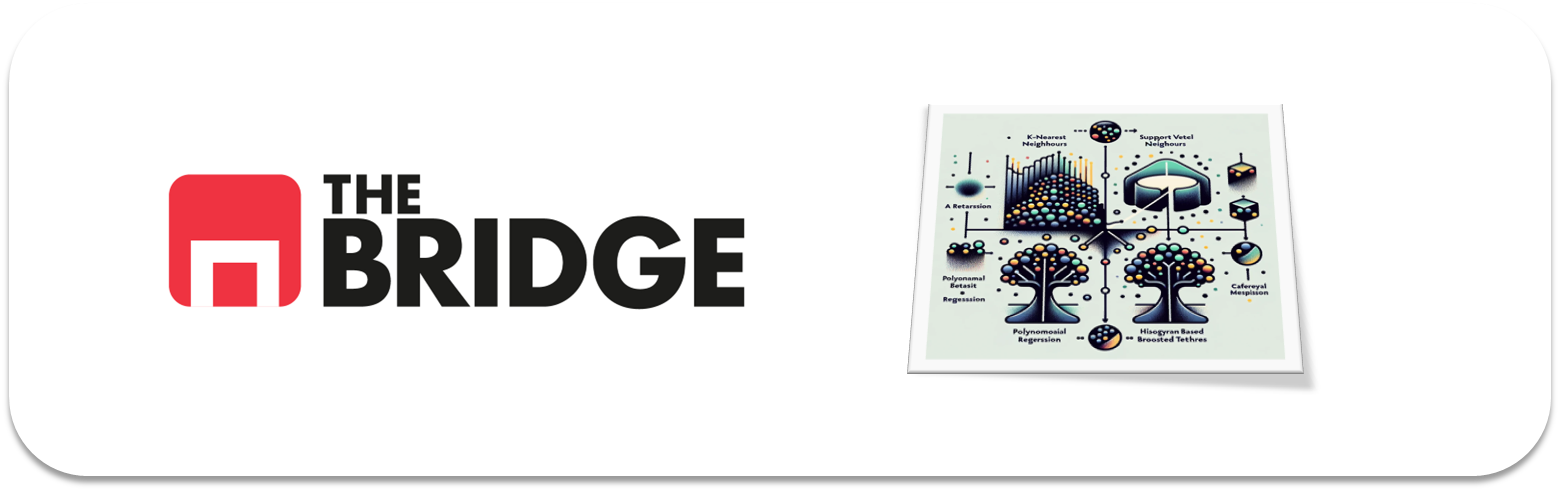

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toolbox_martin as tbm

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_val_predict
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from xgboost import XGBClassifier


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df=pd.read_csv("./data/wines_dataset.csv", sep="|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# Modelo Clasificacion
target1="quality"
# Modelo Regresion
target2="alcohol"

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

## Indentificar target/ problema de negocio

Se trata de un modelo de clasificación multiclase, con la variable quality como target. El conjunto esta limpio y listo para usar.

In [6]:
# analisis del conjunto 
analisis=tbm.analizar_df(df)
analisis

,Columna,Tipo,Cardinalidad,% Cardinalidad,Numero de nulos,% Nulos
0,fixed acidity,float64,106,1.631522,0,0.0
1,volatile acidity,float64,187,2.878252,0,0.0
2,citric acid,float64,89,1.369863,0,0.0
3,residual sugar,float64,316,4.863783,0,0.0
4,chlorides,float64,214,3.293828,0,0.0
5,free sulfur dioxide,float64,135,2.077882,0,0.0
6,total sulfur dioxide,float64,276,4.248115,0,0.0
7,density,float64,998,15.360936,0,0.0
8,pH,float64,108,1.662306,0,0.0
9,sulphates,float64,111,1.708481,0,0.0


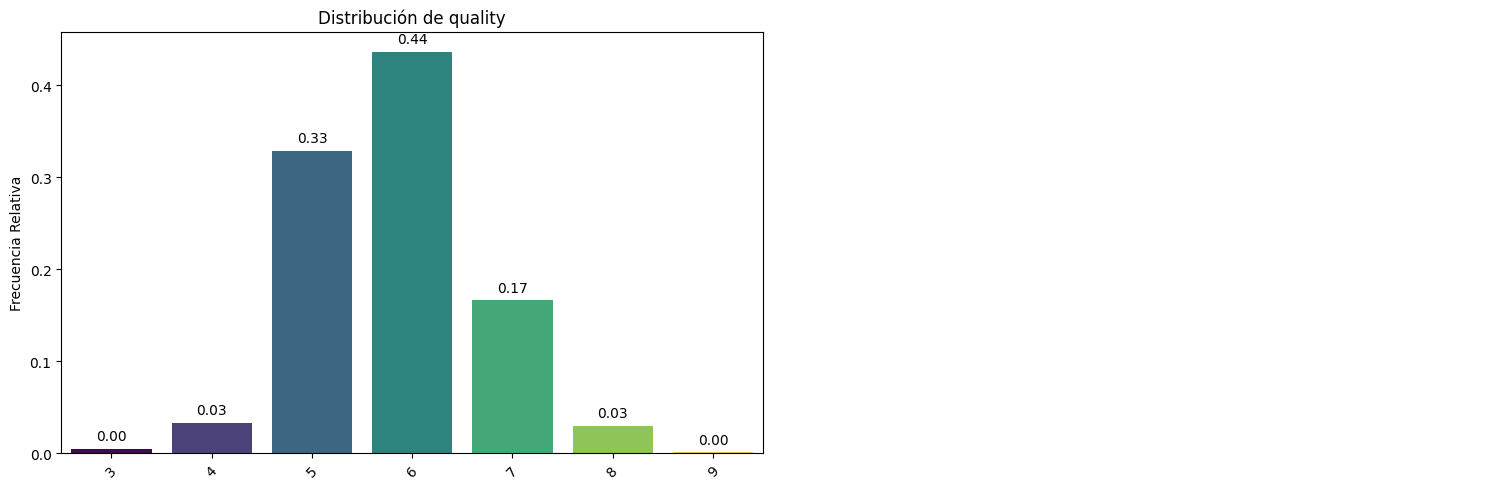

In [7]:
# Distribucion target1="quality"
bt.pinta_distribucion_categoricas(df,[target1],True,True)

In [8]:
df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

No tengo en las salidas todos los valores de calidad, no sé si eso puede afectar a mi modelo pero creo que si. 
La distribución parece muy desbalanceada, 5-6-7 valores suman el 90% de los datos

In [9]:
# Crear un diccionario de mapeo
class_mapping = {"white": 0, "red": 1}
df['class'] = df['class'].replace(class_mapping)

## Train/Test

In [10]:
train_set, test_set=train_test_split(df,test_size=0.2, random_state=42)
X_train = train_set.drop(target1, axis=1)
y_train = train_set[target1]
X_test = test_set.drop(target1, axis = 1)
y_test = test_set[target1]

## Nulos

El dataset no contiene nulos ni valores que debamos corregir

## MiniEDA

Vamos a analizar las variables numericas con un pairplot para ver su distrubución.

In [11]:
feat_cat=["class"]

In [12]:
#numero de columnas num
feat_num=train_set.columns.drop(["quality","class"]).tolist()
print(len(feat_num))
feat_num

11


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [13]:
#features, los divido en 2 partes para ver mejor el pairplot
features_num_1=feat_num[:5]
features_num_2=feat_num[5:]

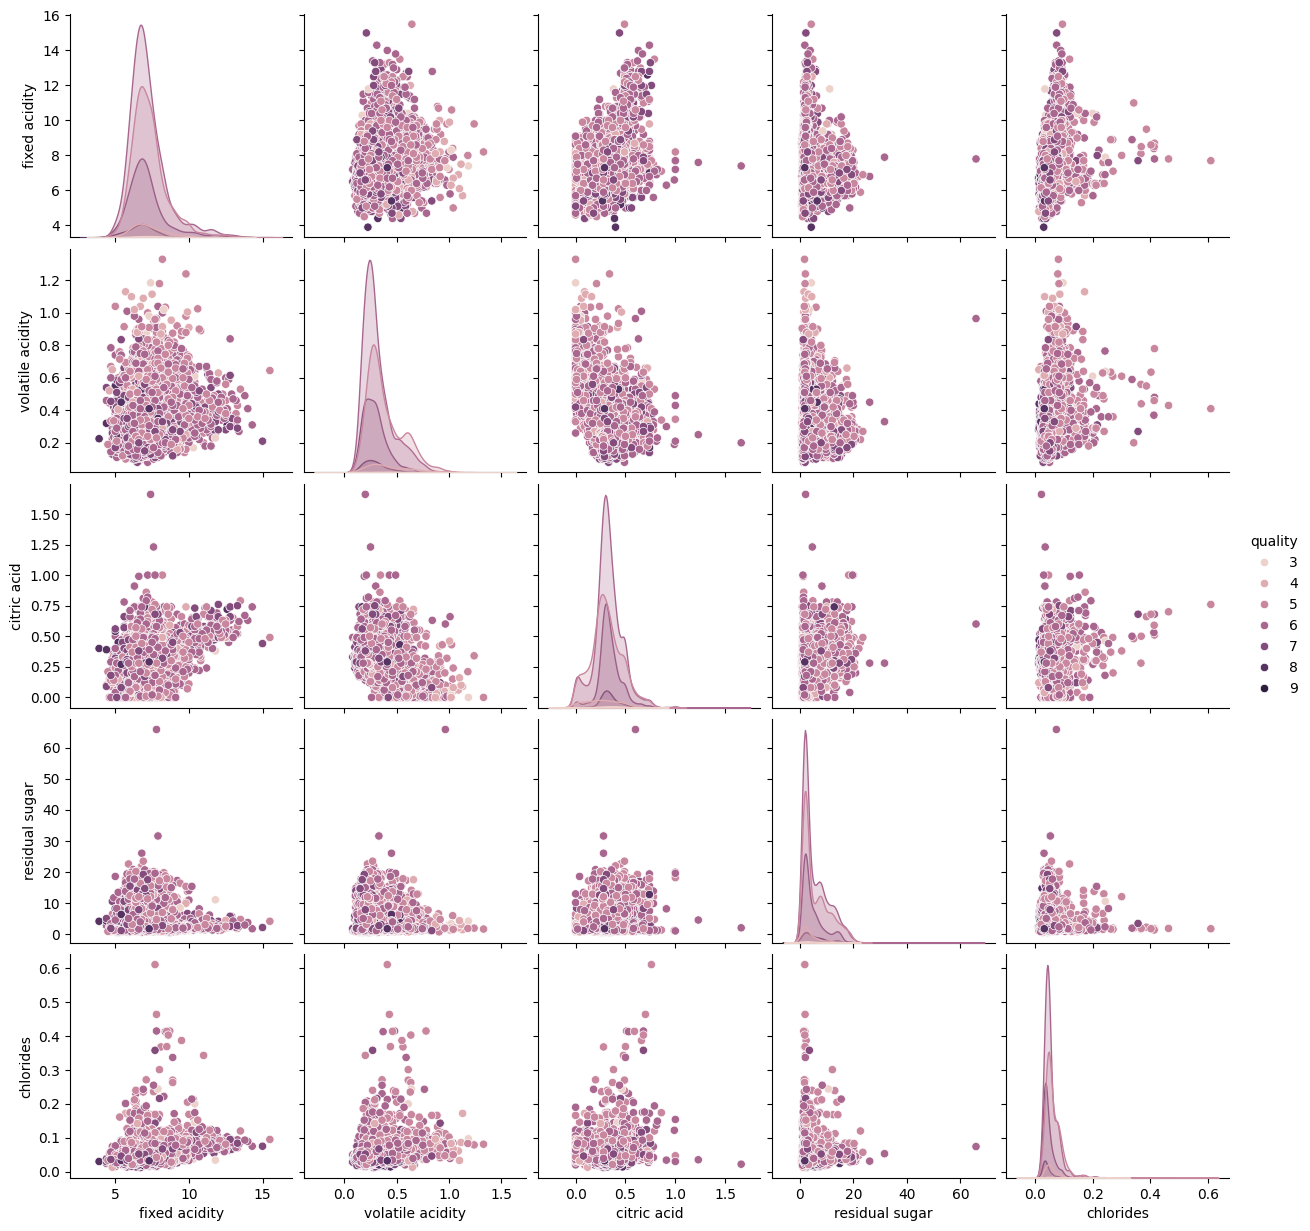

In [14]:
# pairplot 1
sns.pairplot(train_set[features_num_1 + [target1]], hue = target1)

De esta primera vision se ven algunos valores que podrian ser outliers, los veo.
Las variables parecen todas importantes, seguramente tengan bastante correlacion entre ellas.

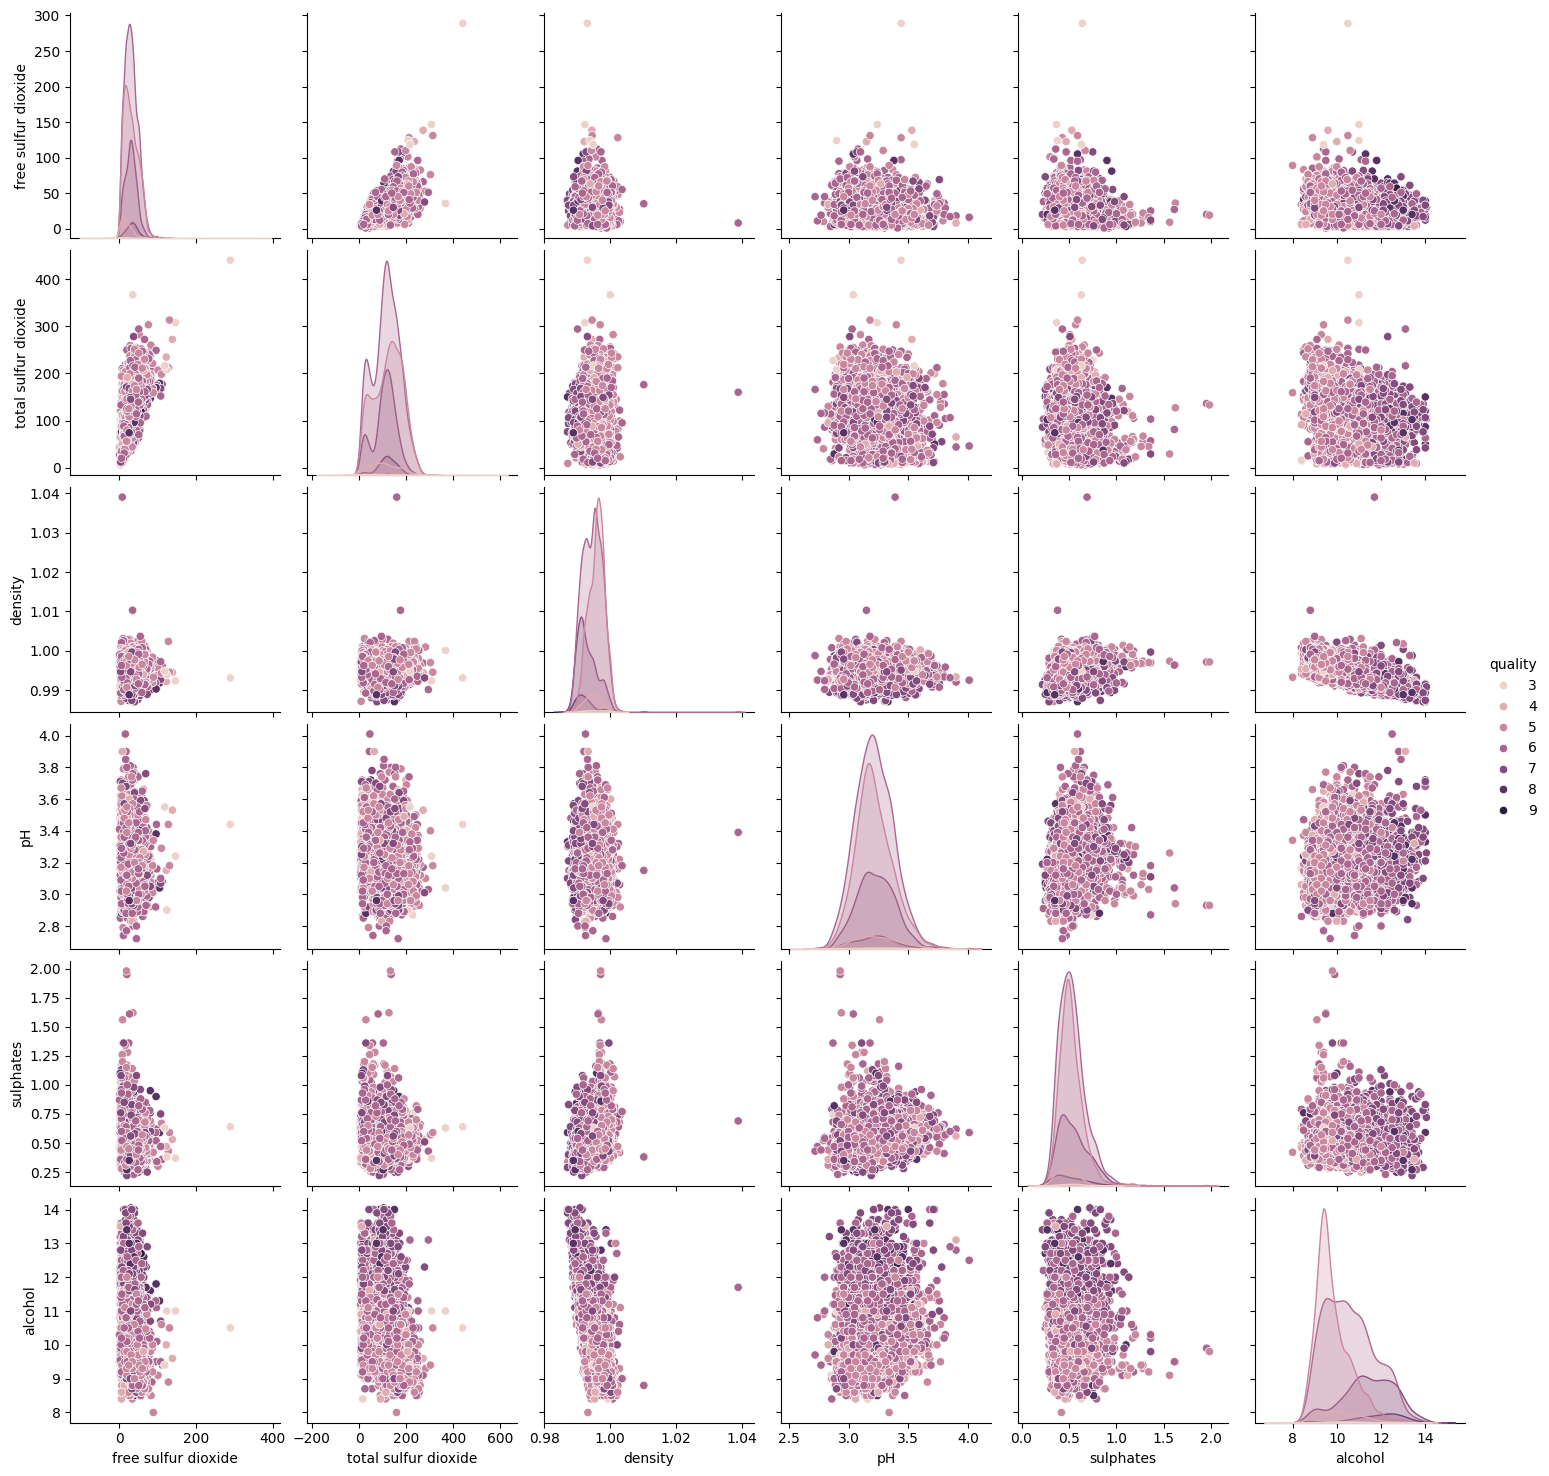

In [15]:
# pairplot 2
sns.pairplot(train_set[features_num_2 + [target1]], hue = target1)

Te estas variables, tambien se aprecia algo de correlacion entre ellas. 
Las que más me llaman la atención son densidad y alcohol.

In [16]:
#forma del train set
train_set.shape

(5197, 13)

## Transformacion

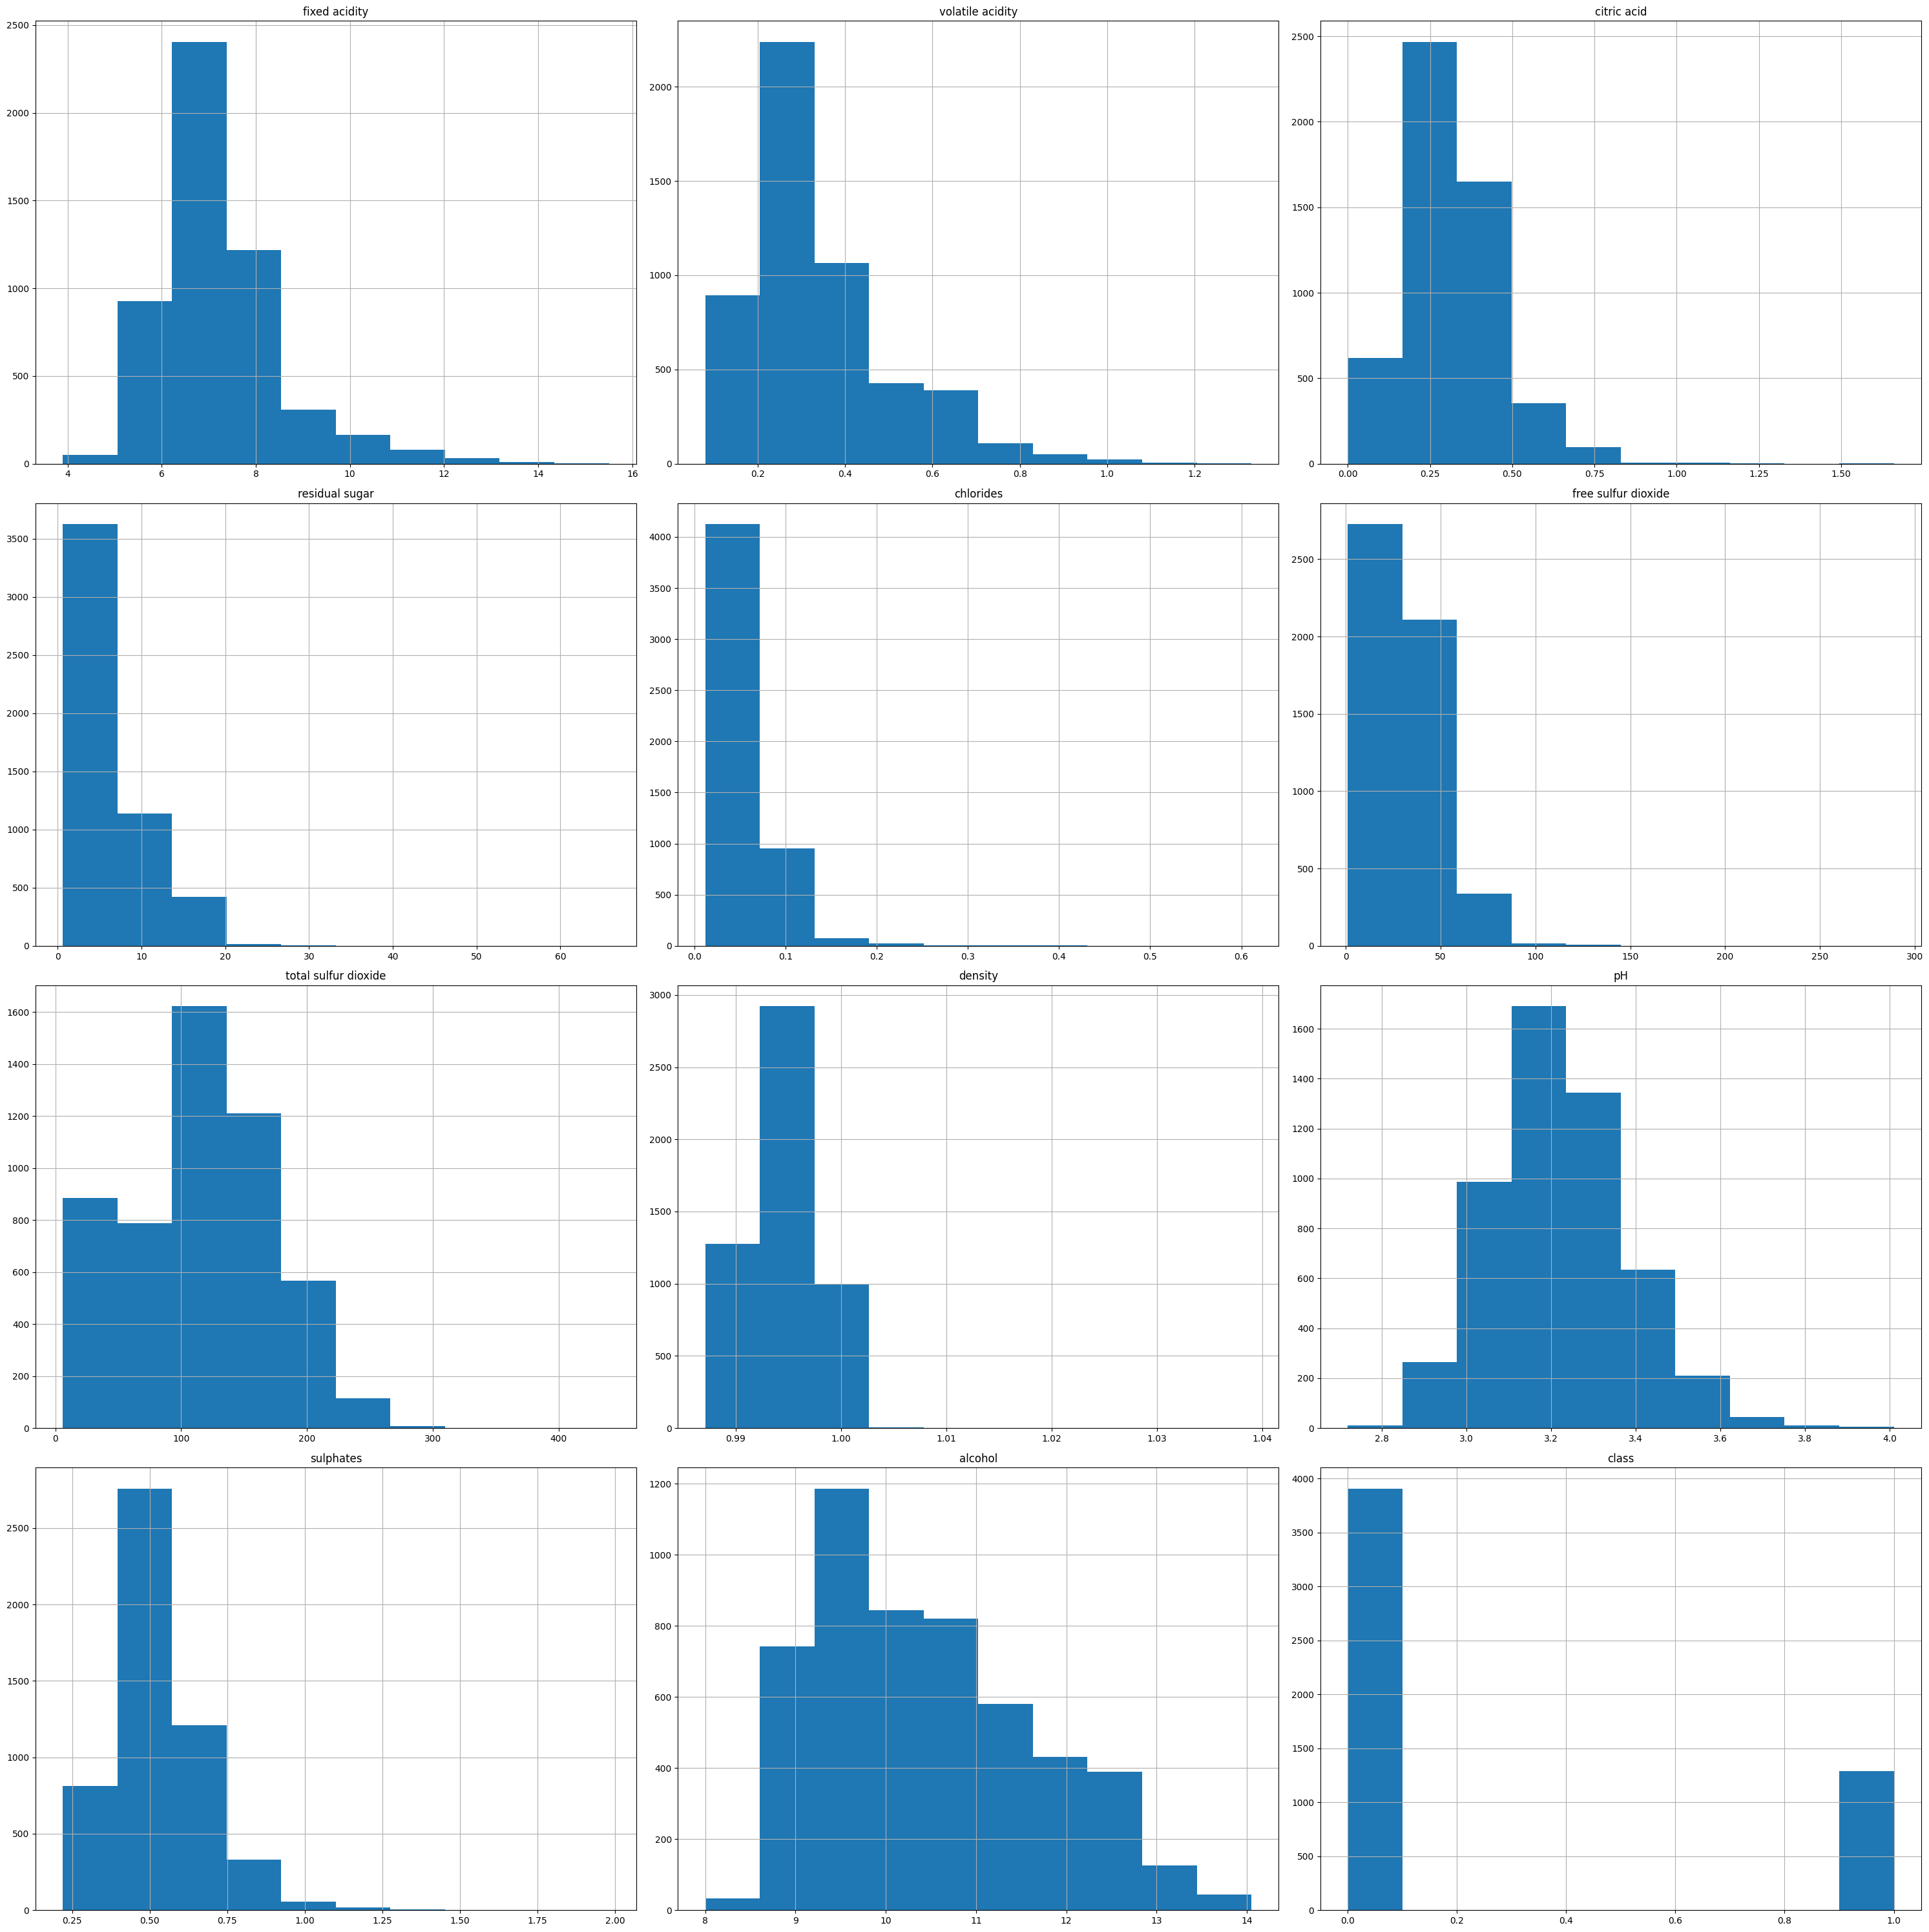

In [17]:
# todas nuestras columnas son numericas
train_set.drop("quality", axis=1).hist(figsize=(30, 30))
plt.tight_layout()
plt.show()

In [18]:
# vamos a tener que hacer el lg en varias columnas
feat_trans=["volatile acidity",
            "citric acid",
            "residual sugar",
            "chlorides",
            "total sulfur dioxide",
            "free sulfur dioxide",
            "density",
            "sulphates",
]

In [19]:
# actualizamos nuestro train y test
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [20]:
for col in feat_trans:
    train_set_scaled[col]=np.log1p(train_set[col])
    test_set_scaled[col]=np.log1p(train_set[col])

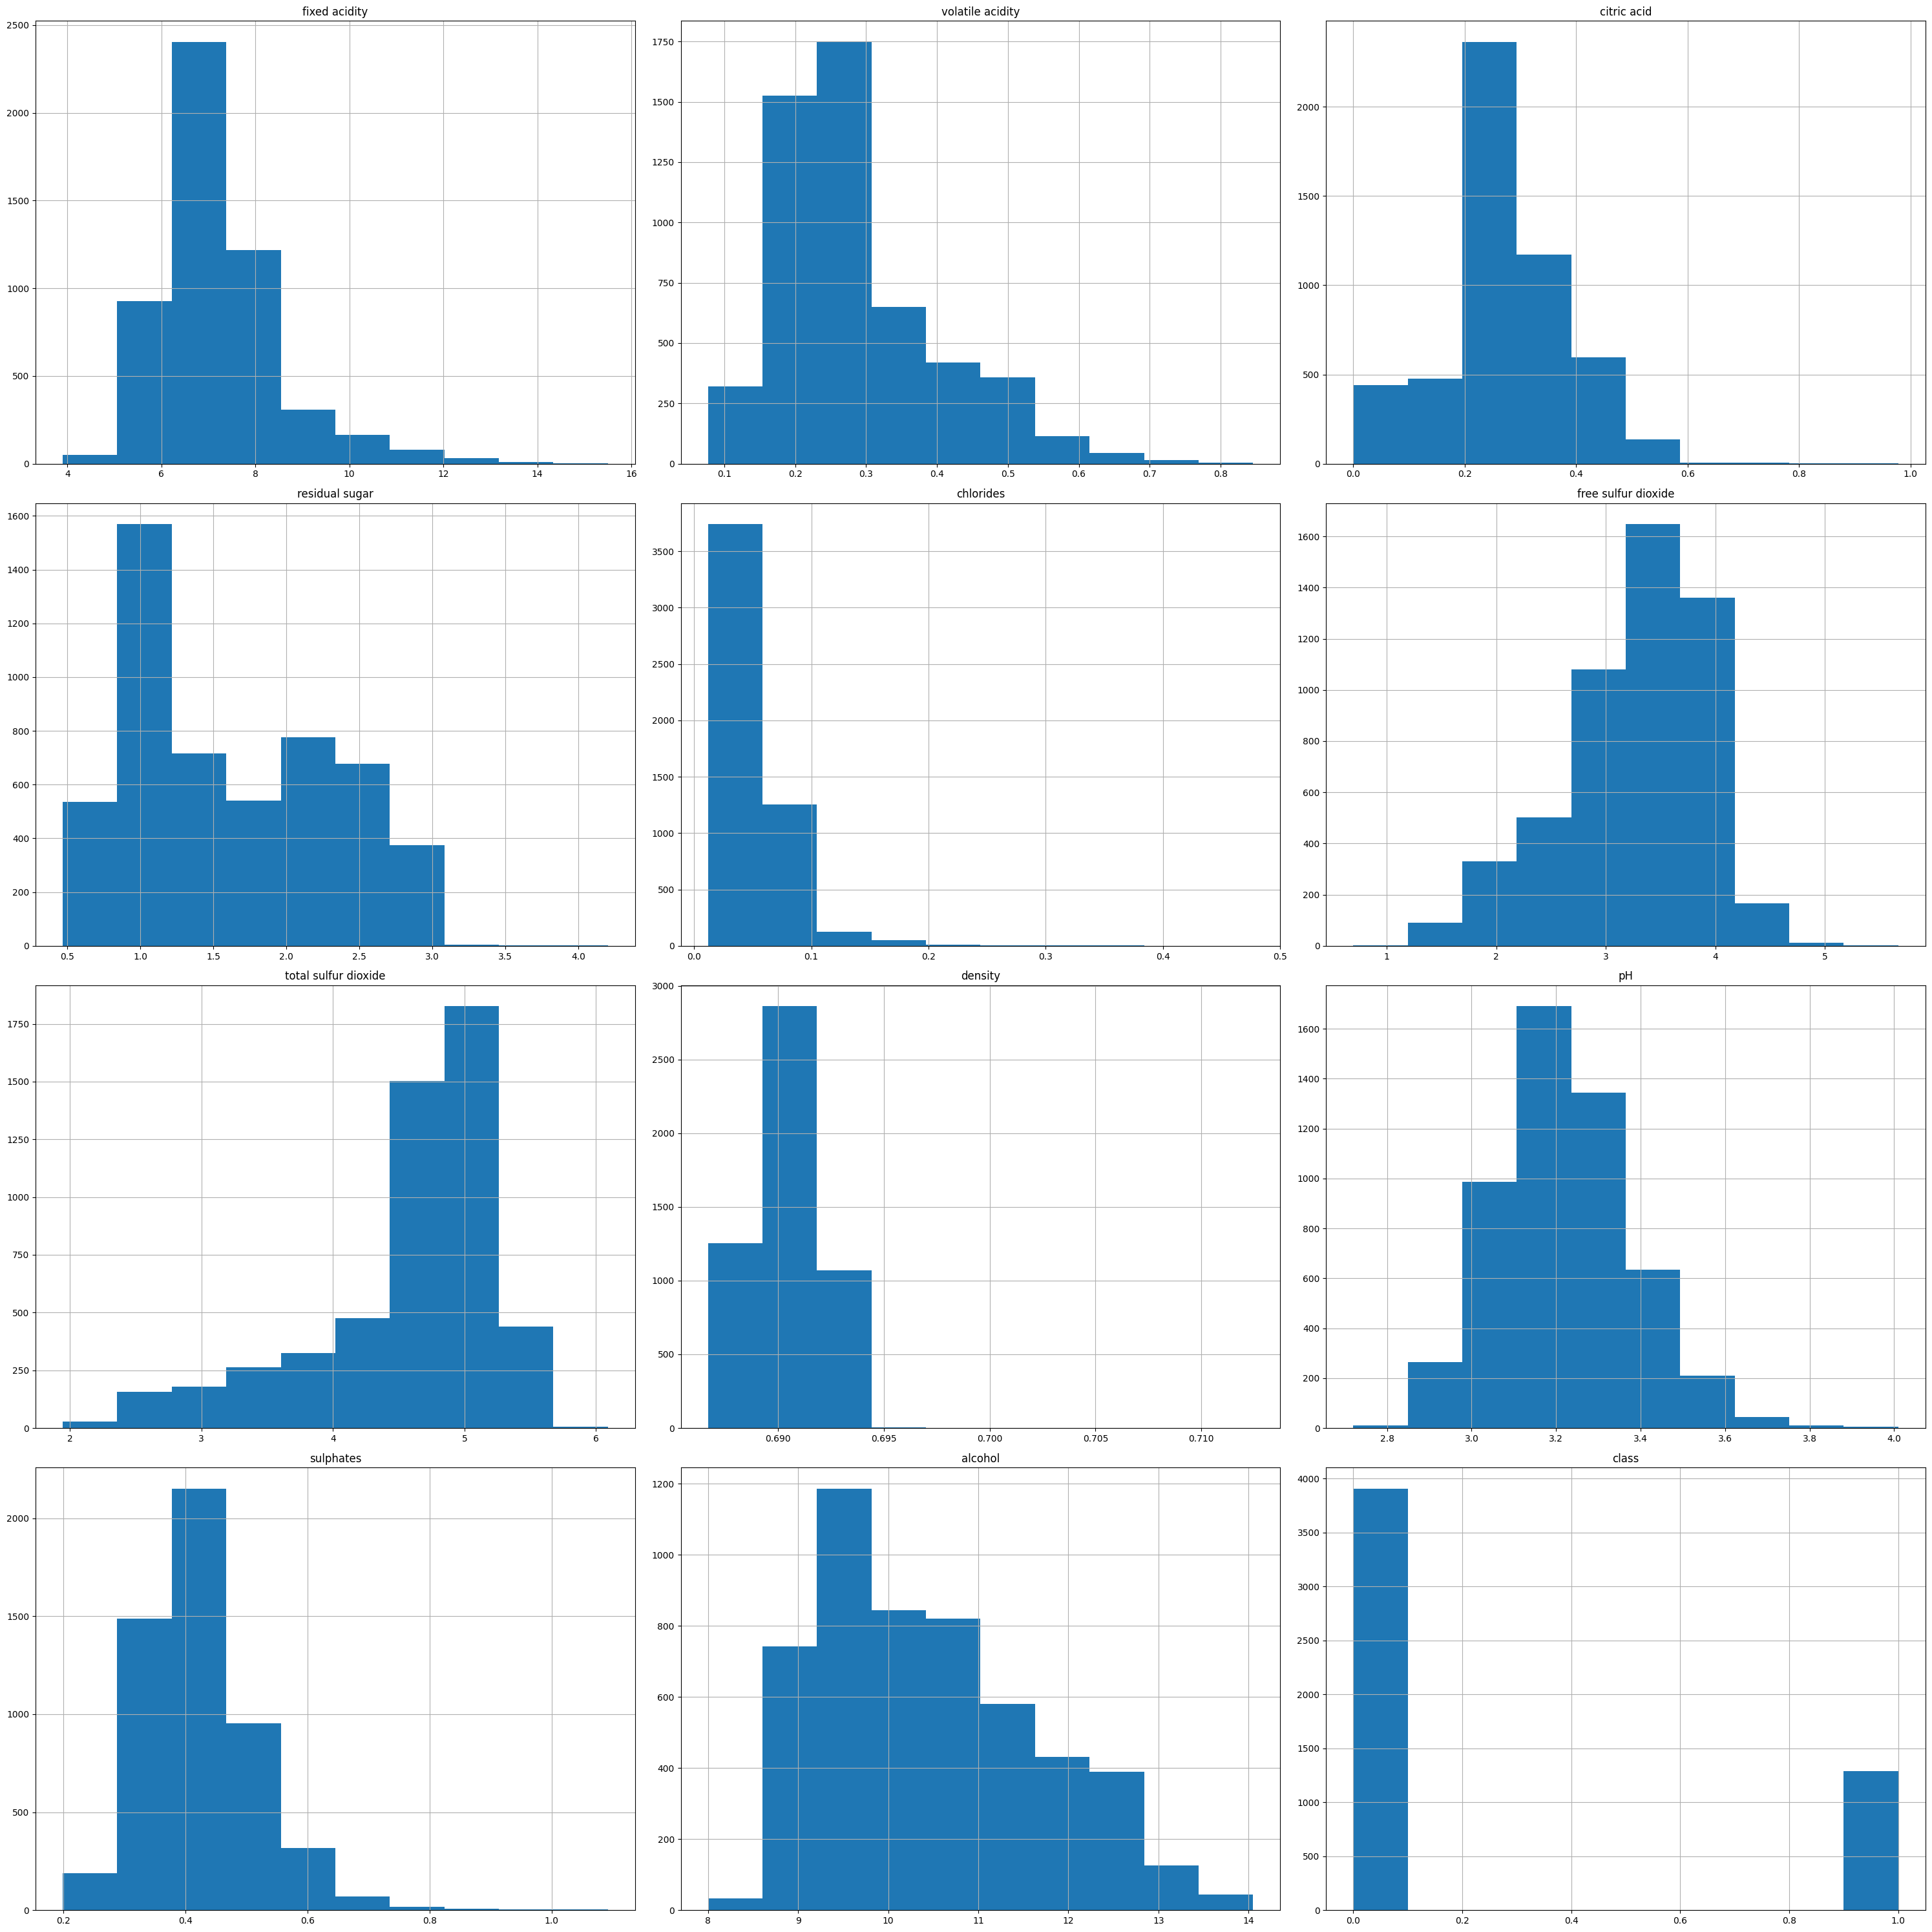

In [21]:
#Vemos como quedan nuestras variables transformadas
train_set_scaled.drop("quality", axis=1).hist(figsize=(30, 30))
plt.tight_layout()
plt.show()

In [22]:
# correlacion entre variables
corr = train_set_scaled.corr(numeric_only = True)
np.abs(corr[target1]).sort_values(ascending = False)

quality                 1.000000
alcohol                 0.450403
density                 0.305392
volatile acidity        0.255032
chlorides               0.206159
class                   0.111889
citric acid             0.110163
free sulfur dioxide     0.095922
fixed acidity           0.071698
sulphates               0.049101
residual sugar          0.021947
pH                      0.011918
total sulfur dioxide    0.000220
Name: quality, dtype: float64

<Axes: >

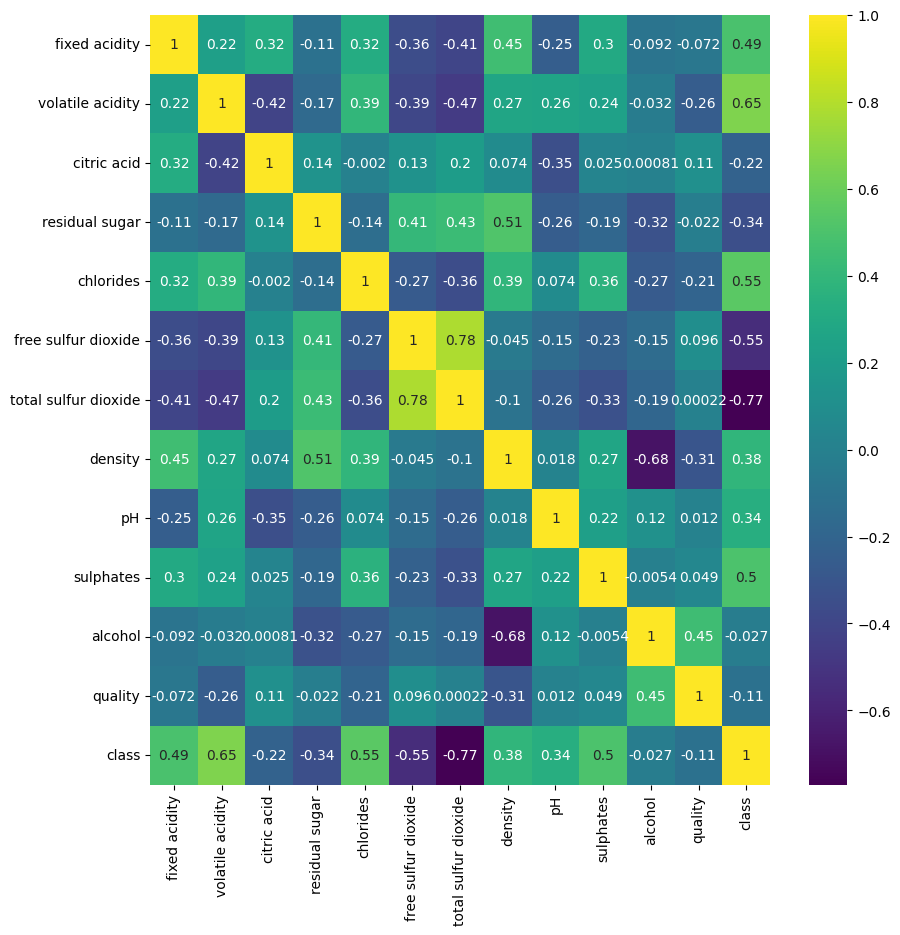

In [23]:
# heatmap correlacion
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "viridis")


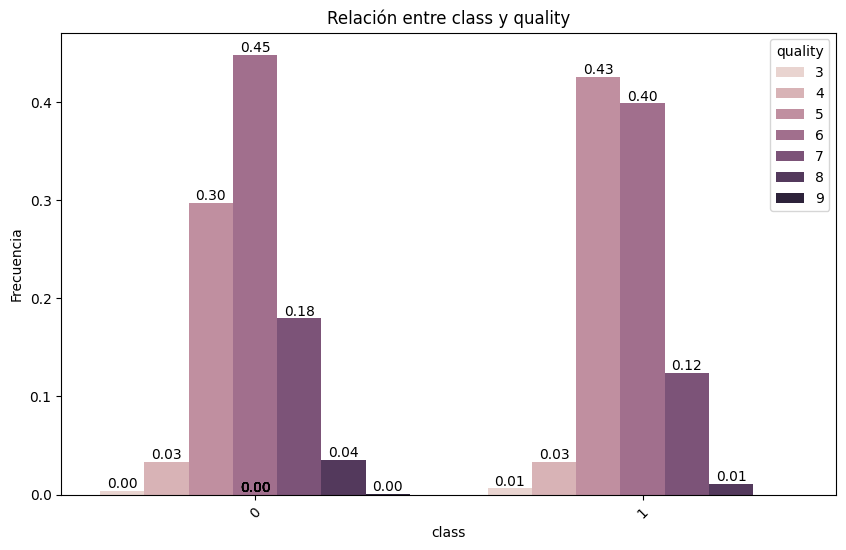

In [24]:
# vemos nuestra variable categorica
bt.plot_categorical_relationship_fin(df,"class","quality",relative_freq=True, show_values=True)

Hay un cambio en el salto de calidad entre el tinto y el blanco. Lo analizamos

In [25]:
# escalamos
scaler = StandardScaler()
train_set_scaled[feat_num] = scaler.fit_transform(train_set_scaled[feat_num])
test_set_scaled[feat_num] = scaler.transform(test_set_scaled[feat_num])

In [26]:
train_set_scaled[feat_num].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,1.093774e-16,6.699364e-17,-5.468868e-18,2.252490e-16,3.554765e-17,-1.955120e-16,-4.593850e-16,1.801172e-14,2.365286e-16,-3.664142e-16,1.346709e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-2.560983e+00,-1.833387e+00,-2.452808e+00,-1.690855e+00,-1.443689e+00,-3.904237e+00,-3.738053e+00,-2.529765e+00,-3.119464e+00,-2.441856e+00,-2.085824e+00
25%,-6.287648e-01,-6.904417e-01,-4.329462e-01,-8.710541e-01,-5.689845e-01,-5.698901e-01,-3.285032e-01,-7.816350e-01,-6.821081e-01,-7.012988e-01,-8.295250e-01
50%,-1.650324e-01,-2.718723e-01,-8.563028e-03,-3.485481e-01,-2.712991e-01,2.053015e-01,2.904724e-01,6.247413e-02,-5.714499e-02,-1.047403e-01,-1.594991e-01
75%,3.759889e-01,4.472740e-01,5.928880e-01,8.556001e-01,3.164710e-01,7.159071e-01,6.845105e-01,7.595484e-01,6.303145e-01,5.297231e-01,6.780332e-01
max,6.404511e+00,4.923997e+00,6.402853e+00,3.775846e+00,1.458776e+01,3.648090e+00,2.153040e+00,1.454270e+01,4.942560e+00,7.345376e+00,2.981247e+00


In [27]:
# todas las features
all_features=feat_num+feat_cat
all_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'class']

In [28]:
X_train = train_set[all_features]
y_train = train_set[target1]

## MODELOS

### KNN

In [29]:
# modelos baseline
knn_model1 = KNeighborsClassifier(n_neighbors=11)
knn_model2 = KNeighborsClassifier(n_neighbors=7)

In [30]:
#validacion cruzada
knn_cv_1=cross_val_score(knn_model1,X_train,y_train,cv=5,scoring="balanced_accuracy")
knn_cv_2=cross_val_score(knn_model2,X_train,y_train,cv=5,scoring="balanced_accuracy")


In [31]:
print(f"Recall medio - Modelo 1: {knn_cv_1.mean()}")
print(f"Recall medio - Modelo 2: {knn_cv_2.mean()}")

Recall medio - Modelo 1: 0.19016136194657868
Recall medio - Modelo 2: 0.21249335630163038


Bastante bajos ambos resultados

In [32]:
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

              precision    recall  f1-score   support

           3       0.50      0.04      0.08        24
           4       0.44      0.06      0.11       173
           5       0.57      0.64      0.60      1706
           6       0.58      0.70      0.64      2274
           7       0.58      0.33      0.42       869
           8       0.61      0.10      0.17       146
           9       0.00      0.00      0.00         5

    accuracy                           0.58      5197
   macro avg       0.47      0.27      0.29      5197
weighted avg       0.57      0.58      0.55      5197



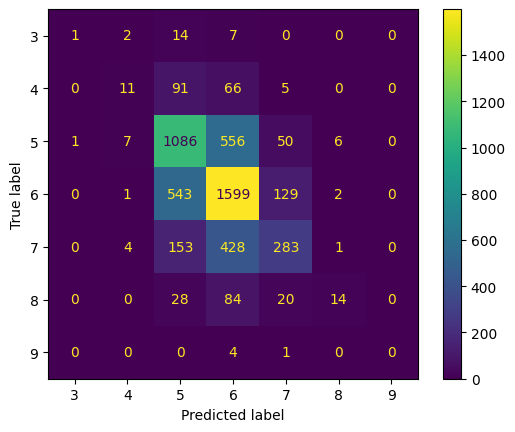

In [33]:
y_pred1=knn_model1.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred1)
print(classification_report(y_train, y_pred1))

In [34]:
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

              precision    recall  f1-score   support

           3       0.50      0.04      0.08        24
           4       0.38      0.10      0.16       173
           5       0.59      0.67      0.63      1706
           6       0.62      0.70      0.66      2274
           7       0.61      0.41      0.49       869
           8       0.61      0.14      0.22       146
           9       0.00      0.00      0.00         5

    accuracy                           0.61      5197
   macro avg       0.47      0.30      0.32      5197
weighted avg       0.60      0.61      0.59      5197



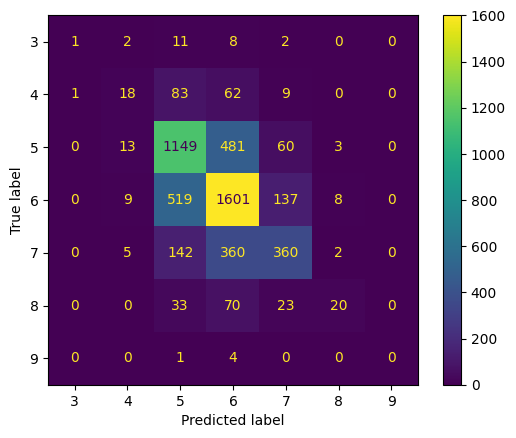

In [35]:
y_pred2=knn_model2.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred2)
print(classification_report(y_train, y_pred2))

Un recall bastante malo en general. elegimos el modelo 2

In [38]:
#modelos
knn_model = KNeighborsClassifier(n_neighbors=7)
rf_model = RandomForestClassifier(max_depth= 5, random_state= 42)
logreg_model = LogisticRegression(random_state=42, max_iter=10000 )

models = [knn_model, rf_model, logreg_model]

In [39]:
# Con una metrica tan desequilibrada haremos el cross validation utilizando balance_accuracy
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy')
    print(f'{model.__class__.__name__} Recall medio: {scores.mean()}')

KNeighborsClassifier Recall medio: 0.21249335630163038
RandomForestClassifier Recall medio: 0.21420080713111633


c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

LogisticRegression Recall medio: 0.2198818972046121


c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#Entrenamiento
for model in models:
    model.fit(X_train, y_train)

c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
def metricas(model,X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

              precision    recall  f1-score   support

           3       0.50      0.04      0.08        24
           4       0.38      0.10      0.16       173
           5       0.59      0.67      0.63      1706
           6       0.62      0.70      0.66      2274
           7       0.61      0.41      0.49       869
           8       0.61      0.14      0.22       146
           9       0.00      0.00      0.00         5

    accuracy                           0.61      5197
   macro avg       0.47      0.30      0.32      5197
weighted avg       0.60      0.61      0.59      5197

************************************************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        24
           4       1.00      0.01      0.01       173
           5       0.66      0.62      0.64      1706
           6       0.54      0.80      0.64      2274
           7       0.68      0.17      0.27       869
           8     

c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

              precision    recall  f1-score   support

           3       1.00      0.04      0.08        24
           4       0.67      0.02      0.04       173
           5       0.60      0.61      0.60      1706
           6       0.52      0.71      0.60      2274
           7       0.49      0.20      0.29       869
           8       0.00      0.00      0.00       146
           9       0.00      0.00      0.00         5

    accuracy                           0.55      5197
   macro avg       0.47      0.23      0.23      5197
weighted avg       0.54      0.55      0.51      5197

************************************************************


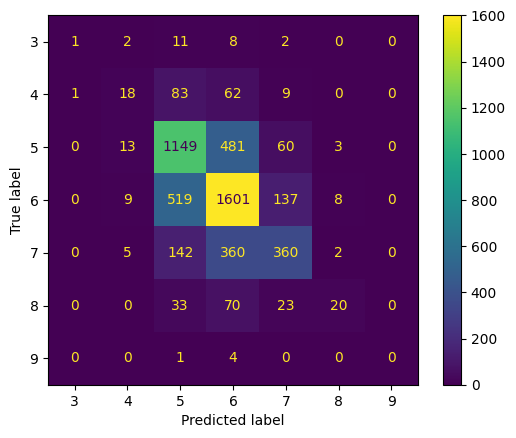

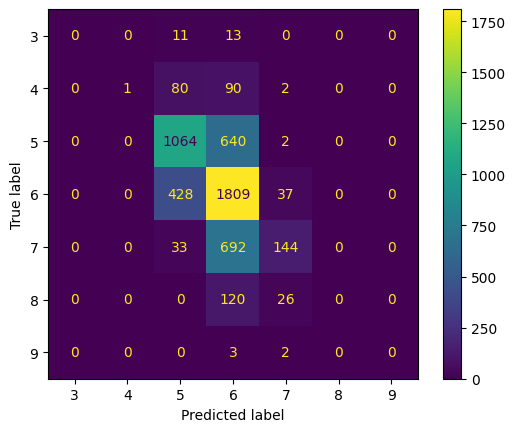

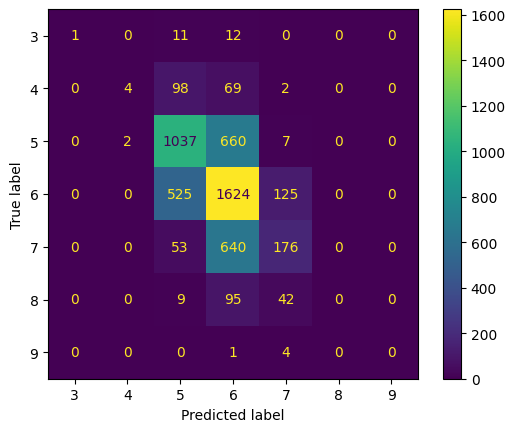

In [42]:
for model in models:
    metricas(model,X_train,y_train)
    print("*"*60)

In [43]:
# Optimización de hiperparámetros para KNN
knn_params = {
'n_neighbors': [11, 15, 21, 25,31],
'weights':["uniform","distance"]}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='balanced_accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Optimización de hiperparámetros para RandomForest
rf_params = {
'n_estimators': [50, 100, 200],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4], 
'max_depth': [3, 5, 7]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='balanced_accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

              precision    recall  f1-score   support

           3       0.50      0.04      0.08        24
           4       0.38      0.10      0.16       173
           5       0.59      0.67      0.63      1706
           6       0.62      0.70      0.66      2274
           7       0.61      0.41      0.49       869
           8       0.61      0.14      0.22       146
           9       0.00      0.00      0.00         5

    accuracy                           0.61      5197
   macro avg       0.47      0.30      0.32      5197
weighted avg       0.60      0.61      0.59      5197

************************************************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        24
           4       1.00      0.01      0.01       173
           5       0.66      0.62      0.64      1706
           6       0.54      0.80      0.64      2274
           7       0.68      0.17      0.27       869
           8     

c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Martín Ámez Segovia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

              precision    recall  f1-score   support

           3       1.00      0.04      0.08        24
           4       0.67      0.02      0.04       173
           5       0.60      0.61      0.60      1706
           6       0.52      0.71      0.60      2274
           7       0.49      0.20      0.29       869
           8       0.00      0.00      0.00       146
           9       0.00      0.00      0.00         5

    accuracy                           0.55      5197
   macro avg       0.47      0.23      0.23      5197
weighted avg       0.54      0.55      0.51      5197

************************************************************


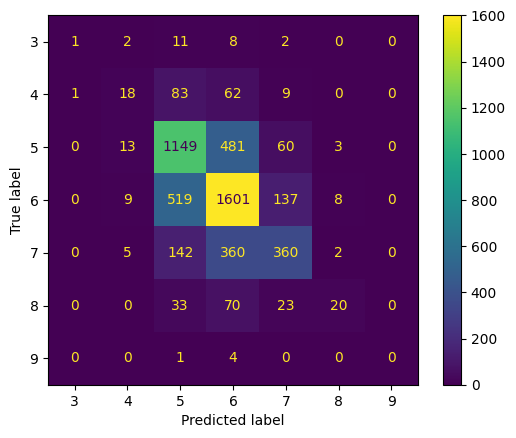

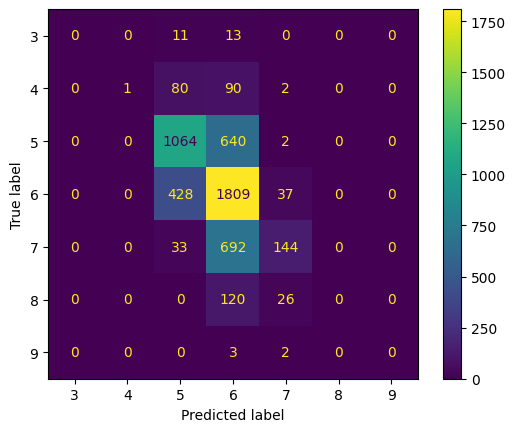

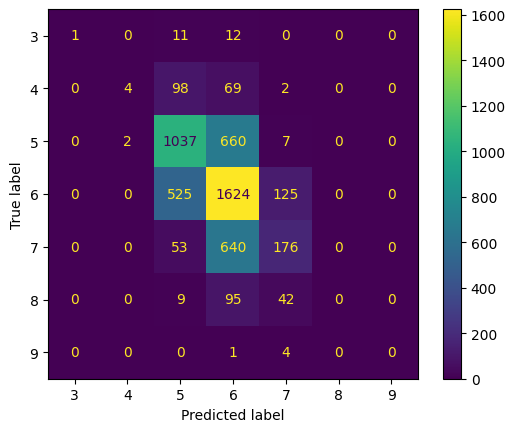

In [44]:
best_models=[best_knn,best_rf]
for model in models:
    metricas(model,X_train,y_train)
    print("*"*60)


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.